# **Cleaning and prepearing data for segmentation**

Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns

In [ ]:
df = pd.read_csv("HW1_var_5.csv", sep = ";")

After reading the file, let's create correlation matrix to define weak parameters

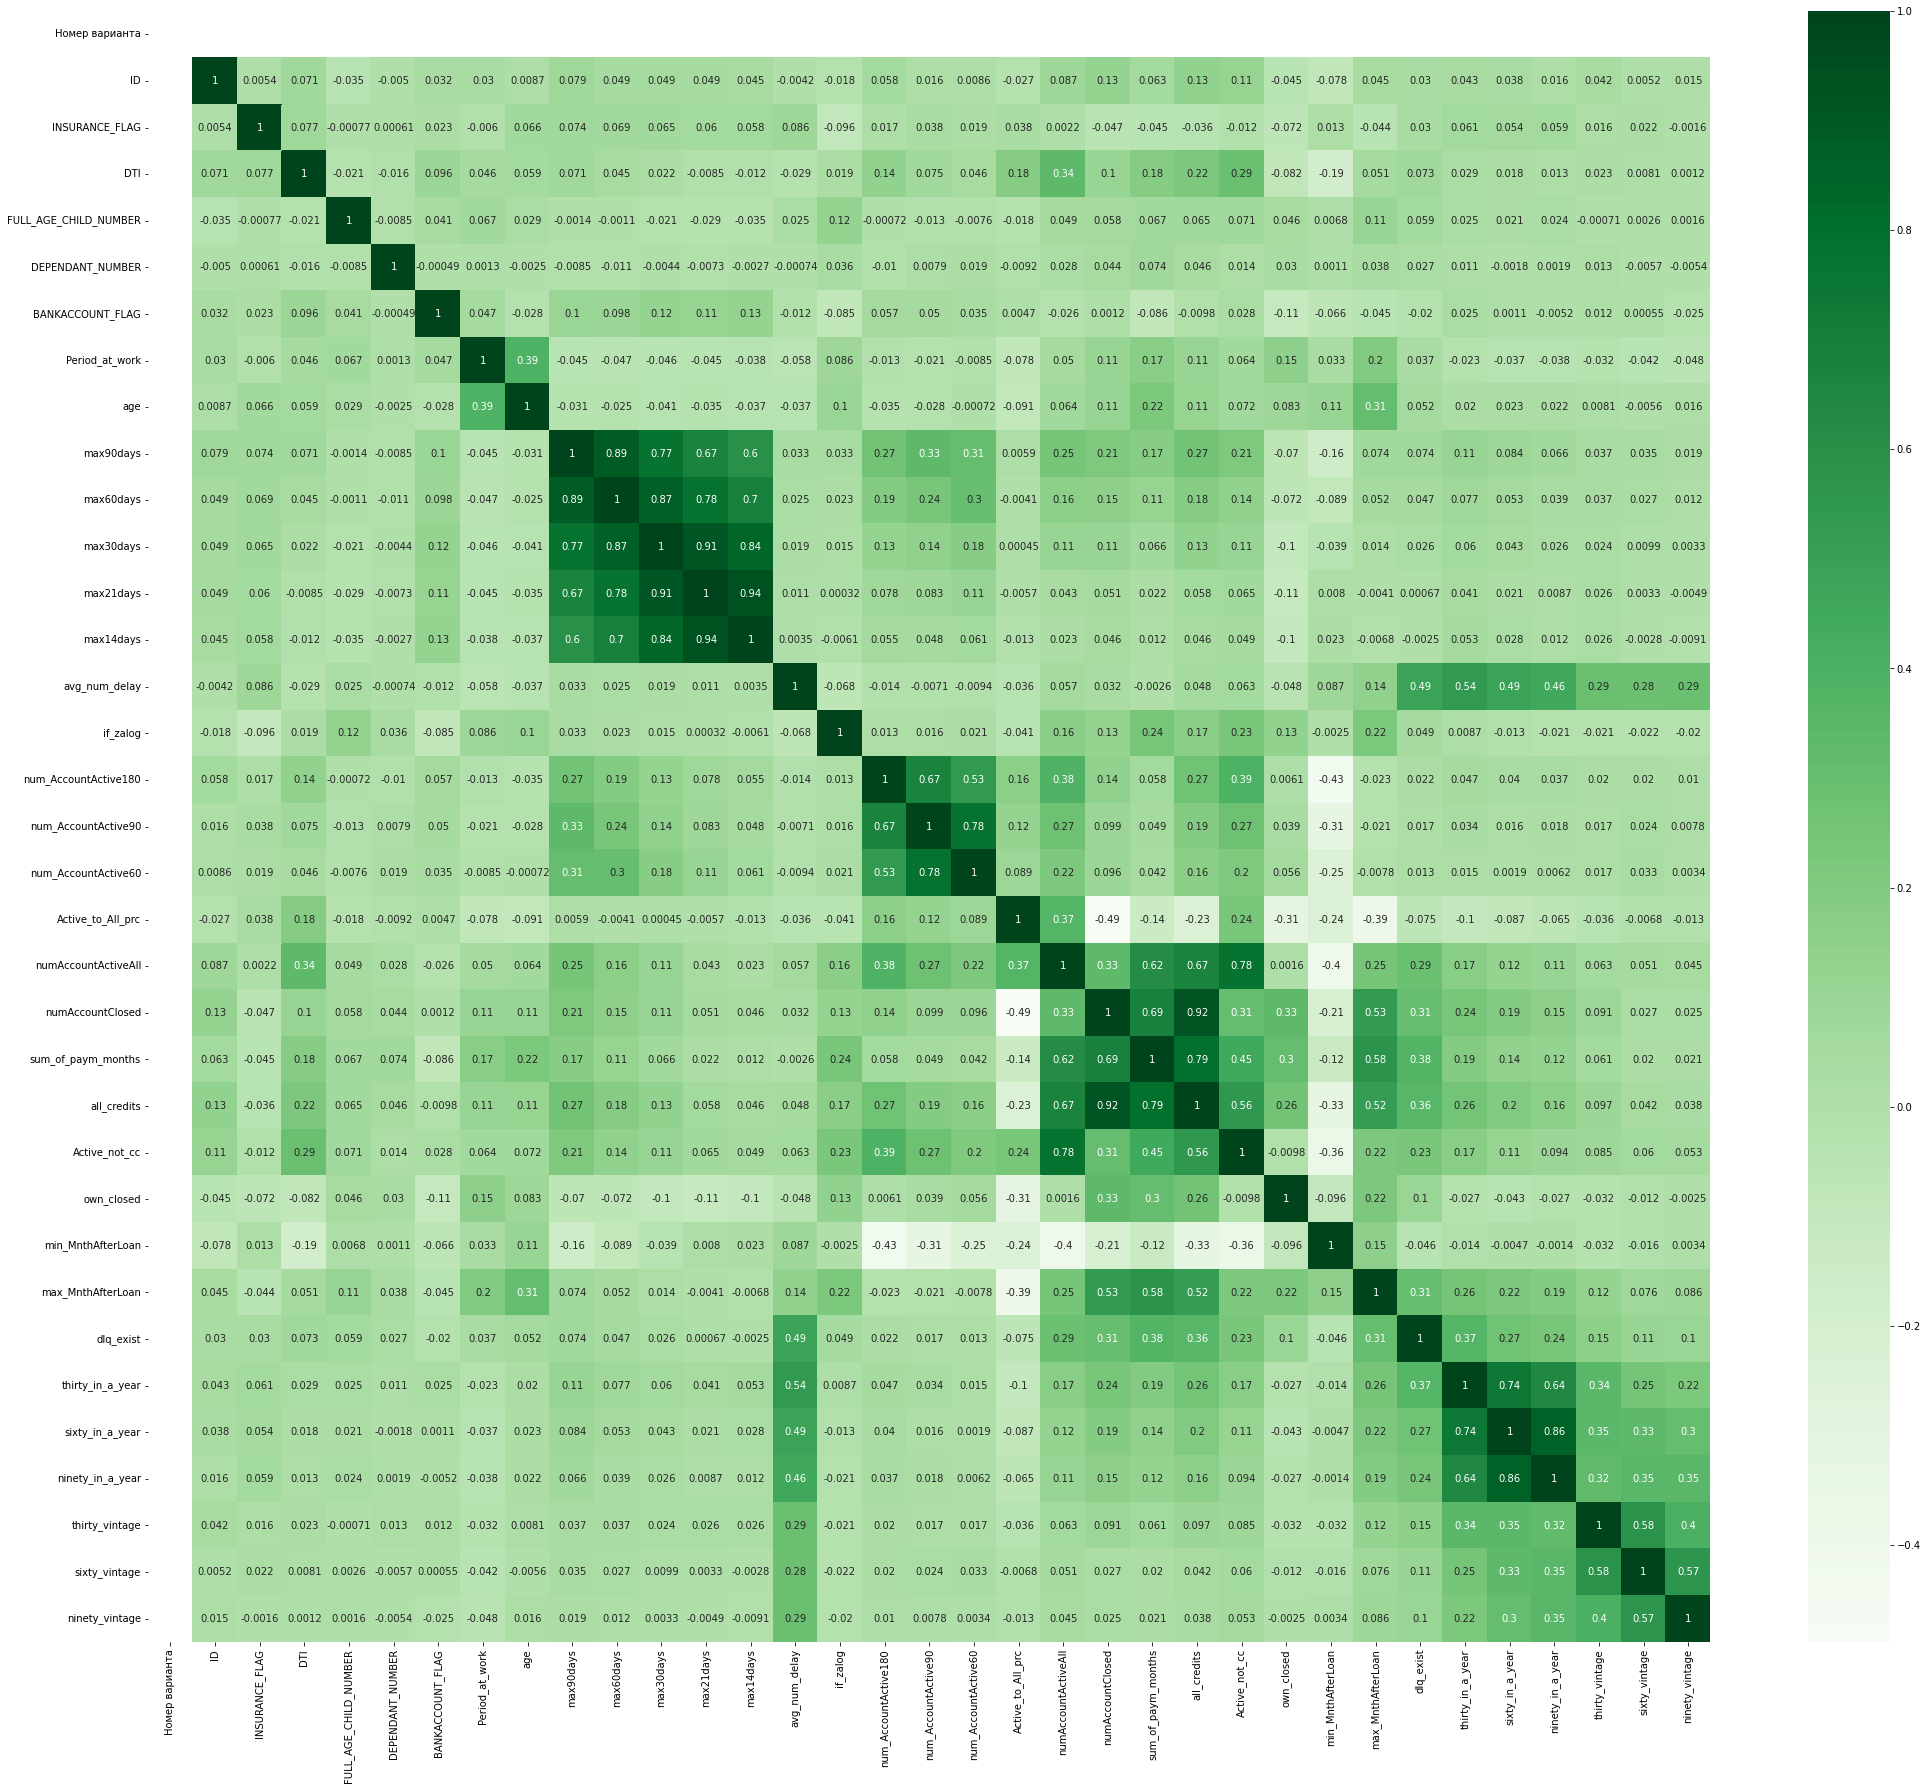

In [ ]:
corr = df.corr()
plt.figure(figsize=(35,30))
sns.heatmap(corr, cmap="Greens",annot=True)

Later, some of these values will be droped. Now, following the task let's calculate UNIQUE, ZERO and NA values using code from the seminar.


In [ ]:
def columnValues(df):
    row = [df.nunique(), (df==0).sum(axis=0), df.isna().sum(), round(df.isna().sum()*100/len(df), 1)]
    return row

table = []
for column in df:
    table.append([column] + columnValues(df[column]))

print(tabulate(table, headers=["Column","Count Unique","Count Zeros","Count NAs","% of NAs"], tablefmt="orgbtl"))

Column                   Count Unique    Count Zeros    Count NAs    % of NAs
---------------------  --------------  -------------  -----------  ----------
Номер варианта                      1              0            0         0
ID                              10243              0            0         0
INCOME_BASE_TYPE                    4              0           57         0.6
CREDIT_PURPOSE                     10              0            0         0
INSURANCE_FLAG                      2           4104            0         0
DTI                                61              1          122         1.2
SEX                                 2              0            0         0
FULL_AGE_CHILD_NUMBER               7           6154            0         0
DEPENDANT_NUMBER                    3          10214            0         0
EDUCATION                           9              0            0         0
EMPL_TYPE                           9              0            9         0.1
EM

As we can see there are a lot of ZERO and NA values, so it is reasonable to
create pie chart to look at their percentage in the whole data.

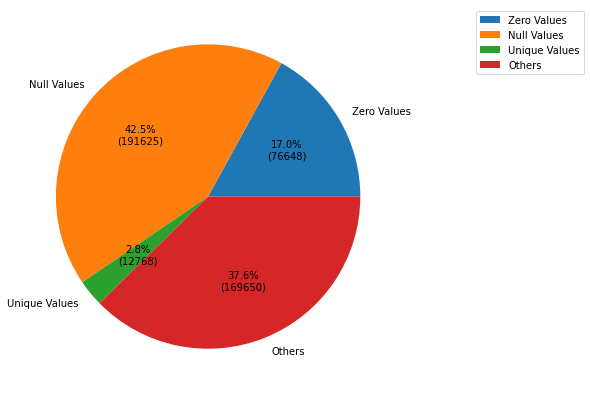

In [ ]:
all = 10243 * 44
null = df.isnull().sum().sum()
unique = df.nunique().sum()
zero = (df==0).sum().sum()
others = all - (null + unique + zero)
x = [int(zero), int(null), int(unique), int(others)]

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
plt.figure(figsize=(10, 7))
plt.pie(x, autopct = lambda pct: func(pct, x), labels = ["Zero Values", "Null Values", "Unique Values", "Others"])
plt.legend(bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

42.5% is the large share, so the goal is to drop some of them. Looking at the previous table (UNIQUE, ZERO and NULL values), we can see that last parameters have same figure of NA's. So we may consider that droping NA's, for instance, from the last column, will also delete others with same share of percent.

Moreover, in this cell I also droped weak correlated parameters.

Namely,

*   "Номер варианта" - it does not make any sence on the data;
*   "INSURANCE_FLAG" - the highest correlation coef. equals -0.096;
*   "FULL_AGE_CHILD_NUMBER" - the highest correlation coef. equals 0.11;
*   "DEPENDANT_NUMBER" - the highest correlation coef. equals 0.074;
*   "BANKACCOUNT_FLAG" - the highest correlation coef. equals 0.13.  

In [ ]:
df = df.drop(["Номер варианта",
              "INSURANCE_FLAG",
              "FULL_AGE_CHILD_NUMBER",
              "DEPENDANT_NUMBER",
              "BANKACCOUNT_FLAG"], axis = 1)
df.dropna(subset=["ninety_vintage"], inplace=True)
df.shape

(3676, 39)

In [ ]:
def columnValues(df):
    row = [df.nunique(), (df==0).sum(axis=0), df.isna().sum(), round(df.isna().sum()*100/len(df), 1)]
    return row

table = []
for column in df:
    table.append([column] + columnValues(df[column]))

print(tabulate(table, headers=["Column","Count Unique","Count Zeros","Count NAs","% of NAs"], tablefmt="orgbtl"))

Column                  Count Unique    Count Zeros    Count NAs    % of NAs
--------------------  --------------  -------------  -----------  ----------
ID                              3676              0            0         0
INCOME_BASE_TYPE                   4              0            0         0
CREDIT_PURPOSE                    10              0            0         0
DTI                               59              0            0         0
SEX                                2              0            0         0
EDUCATION                          8              0            0         0
EMPL_TYPE                          9              0            0         0
EMPL_SIZE                          3              0            0         0
Period_at_work                   262              0            0         0
age                               39              0            0         0
EMPL_PROPERTY                      5              0            0         0
EMPL_FORM            

As we can see the shape of the data has shrunk a lot. However, some of null data is present in the dataframe, namely: *max90days, max60days, max30days, max21days, max14days* and  *avg_num_delay*, which I will fill by myself using mean and median.
Thus, the next step of the task is to calculate:


*   Mean
*   Meadian
*   Standard deviation
*   Min value
*   Max value
*   Type of value

However, DataFrame has some objectives, so I saved data without objective variables to *df_numeric*, to avoid any obsticles.



In [ ]:
df_numeric = df.drop(["INCOME_BASE_TYPE",
                        "CREDIT_PURPOSE",
                        "SEX", "EDUCATION",
                        "EMPL_TYPE", "EMPL_SIZE",
                        "EMPL_PROPERTY",
                        "EMPL_FORM",
                        "FAMILY_STATUS"], axis = 1)
def columnValue(df_numeric):
  row = [df_numeric.mean(), df_numeric.median(), df_numeric.std(), df_numeric.min(), df_numeric.max(), df_numeric.dtypes]
  return row

table = []
for column in df_numeric:
    table.append([column] + columnValue(df_numeric[column]))

print(tabulate(table, headers=["Column","mean","median","std","min", "max", "type"], tablefmt="orgbtl"))

Column                        mean        median           std           min            max  type
--------------------  ------------  ------------  ------------  ------------  -------------  -------
ID                     1.09824e+06   1.09274e+06  60120.9        1.00004e+06    1.20480e+06  int64
DTI                    0.391055      0.41             0.134363   0.01           0.6          float64
Period_at_work        56.0724       40               55.4907     6            966            float64
age                   35.9698       34                8.37865   23             62            float64
max90days              1.58547       1                1.90645    0             18            float64
max60days              1.11758       1                1.61392    0             18            float64
max30days              0.81546       0                1.33956    0             15            float64
max21days              0.590909      0                1.16021    0             15            flo

Well, time to fill out NA's using results

In [ ]:
df['max90days'].fillna(float(df['max90days'].median()), inplace=True)
df['max60days'].fillna(float(df['max60days'].median()), inplace=True)
df['max30days'].fillna(float(df['max30days'].median()), inplace=True)
df['max21days'].fillna(float(df['max21days'].median()), inplace=True)
df['max14days'].fillna(float(df['max14days'].median()), inplace=True)
df['avg_num_delay'].fillna(float(df['max14days'].mean()), inplace=True)

In [ ]:
def columnValues(df):
    row = [df.nunique(), (df==0).sum(axis=0), df.isna().sum(), round(df.isna().sum()*100/len(df), 1)]
    return row

table = []
for column in df:
    table.append([column] + columnValues(df[column]))

print(tabulate(table, headers=["Column","Count Unique","Count Zeros","Count NAs","% of NAs"], tablefmt="orgbtl"))

Column                  Count Unique    Count Zeros    Count NAs    % of NAs
--------------------  --------------  -------------  -----------  ----------
ID                              3676              0            0           0
INCOME_BASE_TYPE                   4              0            0           0
CREDIT_PURPOSE                    10              0            0           0
DTI                               59              0            0           0
SEX                                2              0            0           0
EDUCATION                          8              0            0           0
EMPL_TYPE                          9              0            0           0
EMPL_SIZE                          3              0            0           0
Period_at_work                   262              0            0           0
age                               39              0            0           0
EMPL_PROPERTY                      5              0            0           0

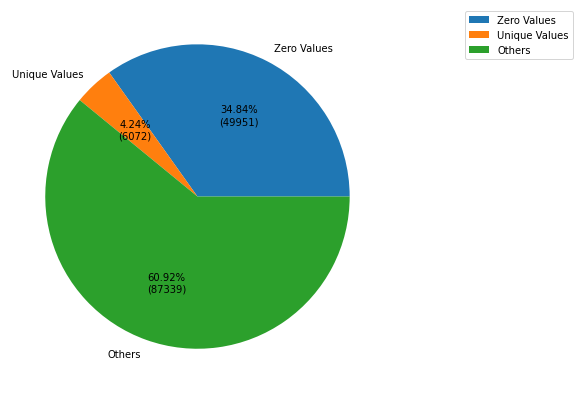

In [ ]:
all = 3676 * 39
null = df.isnull().sum().sum()
unique = df.nunique().sum()
zero = (df==0).sum().sum()
others = all - (null + unique + zero)
x = [int(zero), int(unique), int(others)]

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.2f}%\n({:d})".format(pct, absolute)
plt.figure(figsize=(10, 7))
plt.pie(x, autopct = lambda pct: func(pct, x), labels = ["Zero Values", "Unique Values", "Others"])
plt.legend(bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

As we can see there are not NA values.
However let's check data for some artifacts using get_dummies

In [ ]:
df_na = pd.get_dummies(df, columns = ["INCOME_BASE_TYPE",
                        "CREDIT_PURPOSE",
                        "SEX", "EDUCATION",
                        "EMPL_TYPE", "EMPL_SIZE",
                        "EMPL_PROPERTY",
                        "EMPL_FORM",
                        "FAMILY_STATUS"])
df_na.drop(columns=df_na.iloc[:, range(30)])

def columnValues(df_na):
    row = [df_na.nunique(), (df_na==0).sum(axis=0), df_na.isna().sum(), round(df_na.isna().sum()*100/len(df_na), 1)]
    return row

table = []
for column in df_na:
    table.append([column] + columnValues(df_na[column]))

print(tabulate(table, headers=["Column","Count Unique","Count Zeros","Count NAs","% of NAs"], tablefmt="orgbtl"))

Column                                                     Count Unique    Count Zeros    Count NAs    % of NAs
-------------------------------------------------------  --------------  -------------  -----------  ----------
ID                                                                 3676              0            0           0
DTI                                                                  59              0            0           0
Period_at_work                                                      262              0            0           0
age                                                                  39              0            0           0
max90days                                                            19           1071            0           0
max60days                                                            18           1546            0           0
max30days                                                            16           1978            0     

Looking at all of this, we can figure out, that EDUCATION and EMPL_SIZE have strange parameter **n.a.**. Let's drop it.

In [ ]:
df = df[df.EDUCATION != "*n.a.*"]
df = df[df.EMPL_SIZE != "*n.a.*"]

After all the data is completely cleared, we can safely look at the distribution of some customer characteristics, namely


*   SEX
*   AGE
*   FAMILY_STATUS
*   CREDIT_PURPOSE
*   EDUCATION
*   INCOME_BASE_TYPE



<function matplotlib.pyplot.show(*args, **kw)>

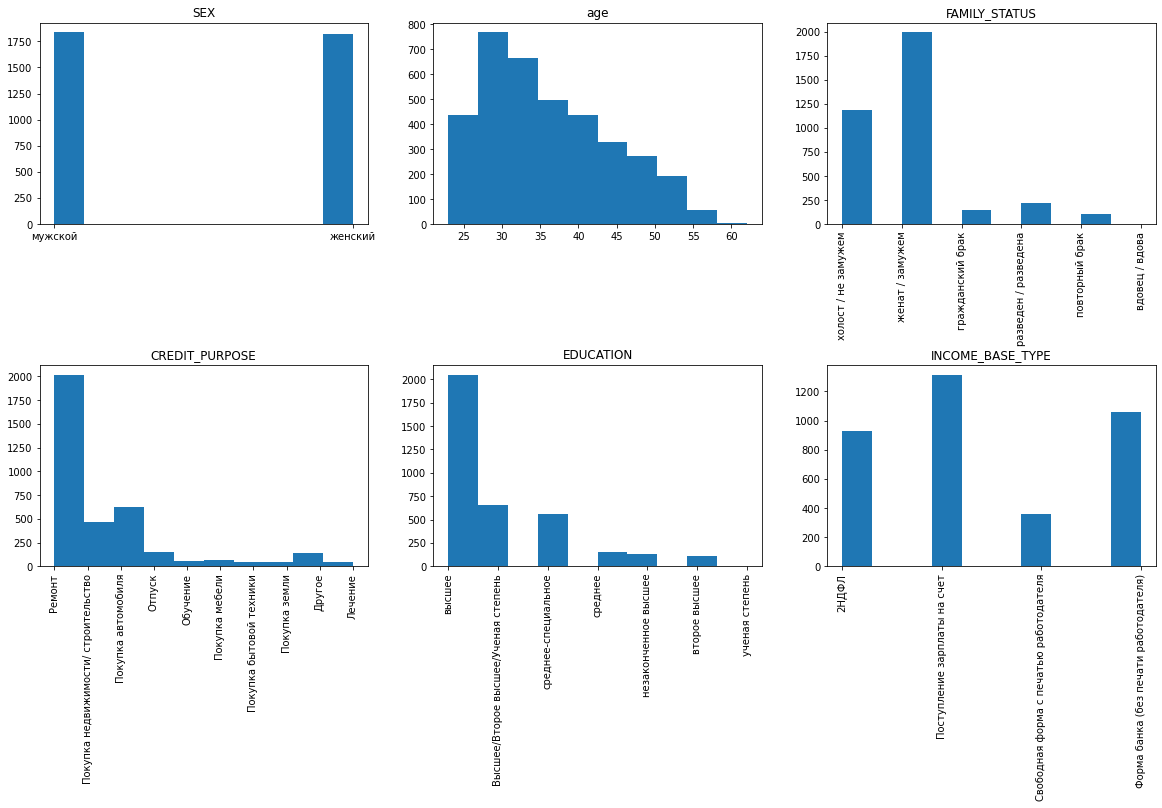

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
plt.hist(df["SEX"])
plt.title("SEX")

plt.subplot(2, 3, 2)
plt.hist(df["age"])
plt.title("age")

plt.subplot(2, 3, 3)
plt.xticks(rotation = 90)
plt.hist(df["FAMILY_STATUS"])
plt.title("FAMILY_STATUS")

plt.subplot(2, 3, 4)
plt.xticks(rotation = 90)
plt.hist(df["CREDIT_PURPOSE"])
plt.title("CREDIT_PURPOSE")

plt.subplot(2, 3, 5)
plt.xticks(rotation = 90)
plt.hist(df["EDUCATION"])
plt.title("EDUCATION")


plt.subplot(2, 3, 6)
plt.xticks(rotation = 90)
plt.hist(df["INCOME_BASE_TYPE"])
plt.title("INCOME_BASE_TYPE")

plt.subplots_adjust(wspace=0.2, hspace=0.7)

plt.show

Finally, we got this data and now we can check new correlation matrix

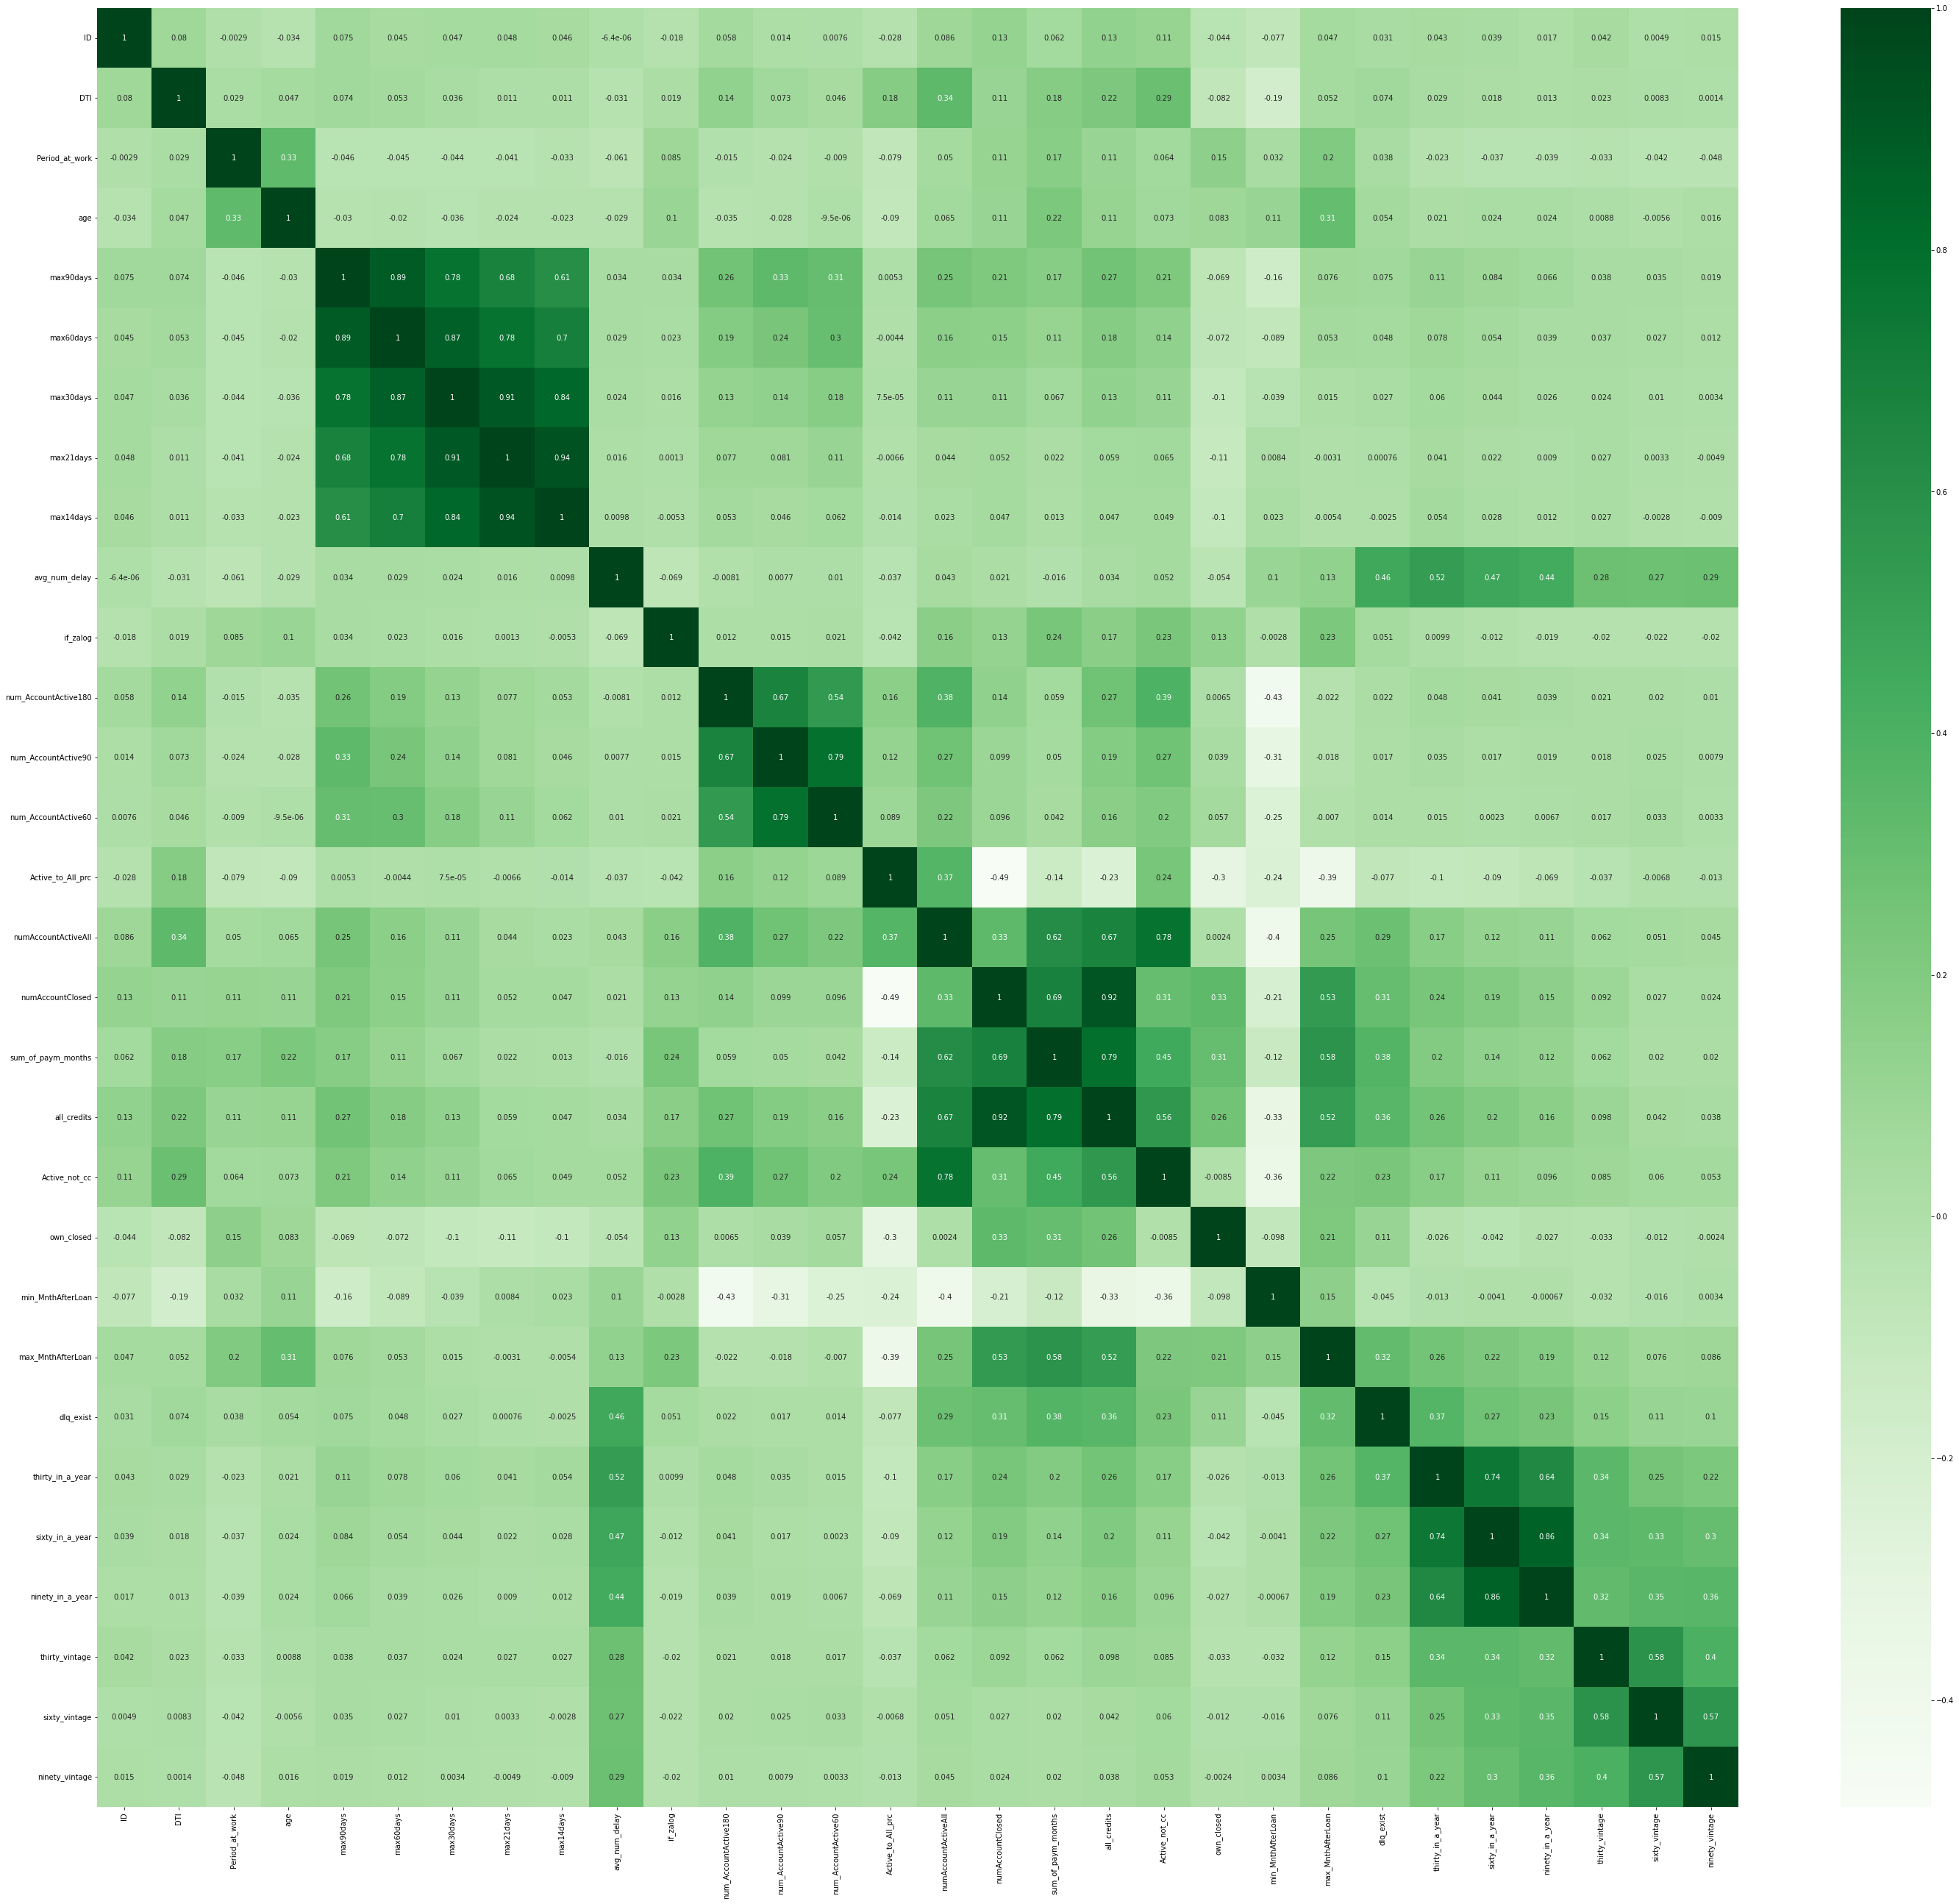

In [ ]:
corr = df.corr()
plt.figure(figsize=(50,45))
sns.heatmap(corr, cmap="Greens",annot=True)

The last step of the preparing data is to convert objective variables to numeric. I performed it in two ways using simple substitution and using dummy variables. Actually, I got better result with dummies, so let's use it

In [ ]:
#df_copy = df
#get all categorical columns
#obj = df.select_dtypes(['object']).columns

#convert all categorical columns to numeric
#df[obj] = df[obj].apply ( lambda x: pd.factorize (x)[ 0 ])

In [ ]:
df = pd.get_dummies(df, columns = ["INCOME_BASE_TYPE",
                        "CREDIT_PURPOSE",
                        "SEX", "EDUCATION",
                        "EMPL_TYPE", "EMPL_SIZE",
                        "EMPL_PROPERTY",
                        "EMPL_FORM",
                        "FAMILY_STATUS"])

# **Segmentation**

# K-means


After the data is completely ready to work, an important step is to scale the data, because the data contains age and some other parameters that are in different ranges.
First, time I used StandardScaler from sklearn, however then I tested normalization using mean and standrard deviation, but provides almost the same result, then I perform min max normalization, which has better result. So, let's use it.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#scaler = StandardScaler()
#scaler.fit(df.drop("ID", axis = 1))
#scaled_features = scaler.transform(df.drop("ID", axis = 1))
#scaled_df = pd.DataFrame(scaled_features, columns = df.drop("ID", axis = 1).columns)
#scaled_df

#scaled_df = (df.drop("ID", axis = 1)-df.drop("ID", axis = 1).mean())/df.drop("ID", axis = 1).std()
scaled_df = (df.drop("ID", axis = 1)-df.drop("ID", axis = 1).min())/df.drop("ID", axis = 1).max()-df.drop("ID", axis = 1).min()
scaled_df

,DTI,Period_at_work,age,max90days,max60days,max30days,max21days,max14days,avg_num_delay,if_zalog,...,EMPL_FORM_Иная форма,EMPL_FORM_Индивидуальный предприниматель,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_вдовец / вдова,FAMILY_STATUS_гражданский брак,FAMILY_STATUS_женат / замужем,FAMILY_STATUS_повторный брак,FAMILY_STATUS_разведен / разведена,FAMILY_STATUS_холост / не замужем
2,0.790000,-5.976190,-22.806452,0.055556,0.055556,0.066667,0.066667,0.066667,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.240000,-5.901656,-22.612903,0.055556,0.055556,0.066667,0.066667,0.066667,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.306667,-5.950311,-22.774194,0.000000,0.000000,0.000000,0.000000,0.000000,0.198068,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.790000,-5.968944,-22.919355,0.277778,0.222222,0.266667,0.200000,0.133333,0.027523,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
13,0.273333,-5.995859,-22.548387,0.333333,0.333333,0.200000,0.200000,0.000000,0.000000,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10230,0.490000,-5.888199,-22.854839,0.388889,0.222222,0.266667,0.266667,0.200000,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
10232,0.706667,-5.980331,-22.854839,0.055556,0.055556,0.066667,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
10235,0.390000,-5.959627,-22.596774,0.111111,0.111111,0.066667,0.000000,0.000000,0.301136,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
10239,0.490000,-5.926501,-22.419355,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Since our data has a lot parameters, it is neccessary to apply the method of principal component analysis - PCA (one of the main ways to reduce the dimensionality of the data, by losing the least amount of information)

In [ ]:
pca = PCA()
pca.fit(scaled_df)

PCA()

In [ ]:
pca.explained_variance_ratio_

array([9.38601839e-02, 8.64838789e-02, 6.46824058e-02, 5.91578475e-02,
       5.77012390e-02, 5.36914408e-02, 4.82976841e-02, 4.67886168e-02,
       4.22600413e-02, 3.78241740e-02, 3.39078601e-02, 2.92966504e-02,
       2.63949742e-02, 2.33271894e-02, 2.22546190e-02, 2.19975963e-02,
       1.82884178e-02, 1.75202674e-02, 1.71851601e-02, 1.60403633e-02,
       1.52225009e-02, 1.47379439e-02, 1.15229495e-02, 1.04053562e-02,
       9.66968389e-03, 8.93005375e-03, 7.35520200e-03, 6.60157580e-03,
       6.30896042e-03, 6.05779573e-03, 6.01480396e-03, 5.67768637e-03,
       5.36357514e-03, 4.85143511e-03, 4.68822125e-03, 4.57140205e-03,
       4.42084201e-03, 4.35084939e-03, 4.06155711e-03, 3.98418414e-03,
       3.58987044e-03, 3.53112052e-03, 2.91028601e-03, 2.66100039e-03,
       2.57850239e-03, 2.23833381e-03, 2.19909152e-03, 1.94238215e-03,
       1.89317975e-03, 1.76814341e-03, 1.67422298e-03, 1.52659437e-03,
       1.42434124e-03, 1.35355635e-03, 1.28346846e-03, 9.11323165e-04,
      

Now the important task is to find the quantity of the right components. Let's use the elbow rule to determine this quantity

Text(0, 0.5, 'Cumulative Explained Variance')

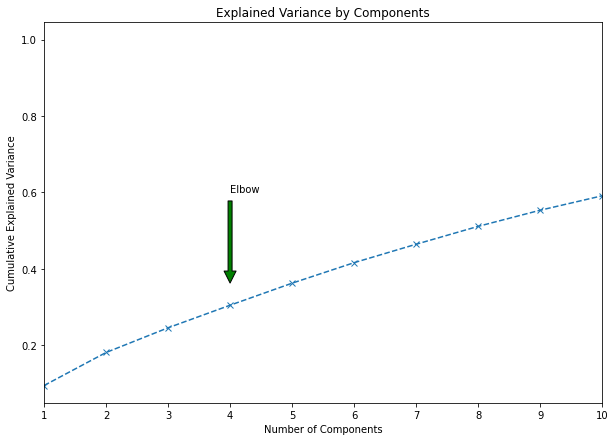

In [ ]:
plt.figure(figsize = (10, 7))
plt.plot(range(1,81), pca.explained_variance_ratio_.cumsum(), marker = "x", linestyle = "--")
plt.xlim([1,10])
plt.annotate('Elbow', xy =(4, 0.35),
                xytext =(4,0.6),
                arrowprops = dict(facecolor ='green',
                                  shrink = 0.05),)

plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")


Let's take the number of components n equal to 4

In [ ]:
pca = PCA(n_components = 4)
scores_pca = pca.fit_transform(scaled_df)

In [ ]:
wcss = []
for i in range(1,21):
  kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

Now a similar process, but to select the number of clusters for k-means. This is how we use the elbow rule.

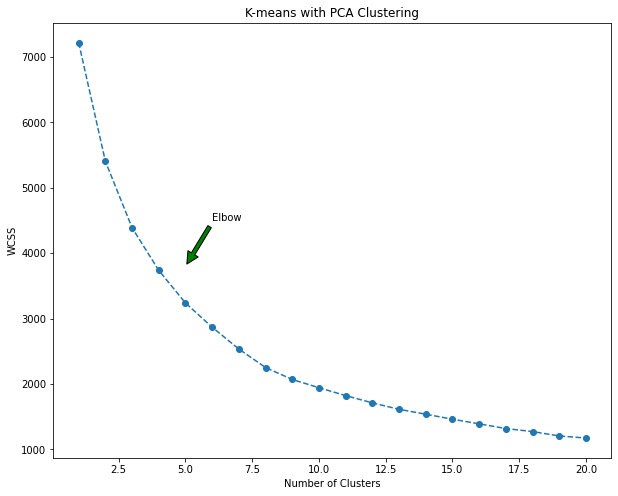

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(range(1,21), wcss, marker = "o", linestyle = "--")
plt.annotate('Elbow', xy =(5, 3800),
                xytext =(6,4500),
                arrowprops = dict(facecolor ='green',
                                  shrink = 0.05),)
plt.xlabel('Number of Clusters')
plt.ylabel("WCSS")
plt.title('K-means with PCA Clustering')
plt.show()

In [ ]:
kmeans_pca = KMeans( n_clusters = 5, n_init = 10, max_iter = 300, random_state = 42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=5, random_state=42)

Add these components and segments to our dataframe

In [ ]:
df_segm_pca_kmeans = pd.concat([scaled_df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-4: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4']
df_segm_pca_kmeans['Segment K-means PCA']= kmeans_pca.labels_

In [ ]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:"first", 1:"second", 2:"third", 3:"fourth", 4:"fifth"})
df_segm_pca_kmeans

,DTI,Period_at_work,age,max90days,max60days,max30days,max21days,max14days,avg_num_delay,if_zalog,...,FAMILY_STATUS_женат / замужем,FAMILY_STATUS_повторный брак,FAMILY_STATUS_разведен / разведена,FAMILY_STATUS_холост / не замужем,Component 1,Component 2,Component 3,Component 4,Segment K-means PCA,Segment
0,0.790000,-5.976190,-22.806452,0.055556,0.055556,0.066667,0.066667,0.066667,0.000000,0.0,...,0.0,0.0,0.0,1.0,-0.098345,-0.331264,-0.479156,0.997223,3,fourth
1,0.240000,-5.901656,-22.612903,0.055556,0.055556,0.066667,0.066667,0.066667,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.342105,-0.976317,-0.532807,0.132014,2,third
2,0.306667,-5.950311,-22.774194,0.000000,0.000000,0.000000,0.000000,0.000000,0.198068,0.0,...,0.0,0.0,0.0,1.0,-1.039509,0.893721,-0.186966,-0.159675,4,fifth
3,0.790000,-5.968944,-22.919355,0.277778,0.222222,0.266667,0.200000,0.133333,0.027523,0.0,...,0.0,0.0,0.0,0.0,-0.755033,0.560675,-0.310518,0.043357,4,fifth
4,0.273333,-5.995859,-22.548387,0.333333,0.333333,0.200000,0.200000,0.000000,0.000000,1.0,...,0.0,0.0,1.0,0.0,1.079924,0.713159,0.025311,0.702052,0,first
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3654,0.490000,-5.888199,-22.854839,0.388889,0.222222,0.266667,0.266667,0.200000,0.000000,0.0,...,0.0,0.0,0.0,1.0,-0.489574,1.403825,0.320268,0.739531,4,fifth
3655,0.706667,-5.980331,-22.854839,0.055556,0.055556,0.066667,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,1.0,-0.160903,1.474845,0.068731,0.677838,4,fifth
3656,0.390000,-5.959627,-22.596774,0.111111,0.111111,0.066667,0.000000,0.000000,0.301136,0.0,...,1.0,0.0,0.0,0.0,-0.075247,0.980551,0.021607,-0.968929,4,fifth
3657,0.490000,-5.926501,-22.419355,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,1.0,0.0,0.0,0.0,1.773309,0.589084,0.420939,-0.114962,0,first


Last step, let's graphically display our segments

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

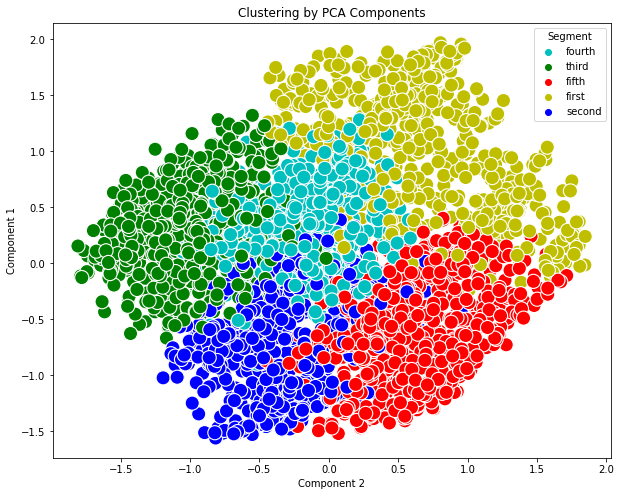

In [ ]:
import seaborn as sns
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10,8))

sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment'], palette = ['c', 'g', 'r', 'y', 'b'], s = 200)
plt.title("Clustering by PCA Components")

plt.show

Now to characterize each of the segments you need to add them to the initial clean dataframe

In [ ]:
df_final = df.reset_index(drop = True)
df_final["Segment K-means PCA"] = df_segm_pca_kmeans["Segment K-means PCA"]

In [ ]:
df_final

,ID,DTI,Period_at_work,age,max90days,max60days,max30days,max21days,max14days,avg_num_delay,...,EMPL_FORM_Индивидуальный предприниматель,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_вдовец / вдова,FAMILY_STATUS_гражданский брак,FAMILY_STATUS_женат / замужем,FAMILY_STATUS_повторный брак,FAMILY_STATUS_разведен / разведена,FAMILY_STATUS_холост / не замужем,Segment K-means PCA
0,1000045,0.49,29.0,35.0,1.0,1.0,1.0,1.0,1.0,0.000000,...,0,0,1,0,0,0,0,0,1,3
1,1000085,0.16,101.0,47.0,1.0,1.0,1.0,1.0,1.0,0.000000,...,0,0,1,0,0,1,0,0,0,2
2,1000105,0.20,54.0,37.0,0.0,0.0,0.0,0.0,0.0,0.198068,...,0,0,1,0,0,0,0,0,1,4
3,1000125,0.49,36.0,28.0,5.0,4.0,4.0,3.0,2.0,0.027523,...,0,0,1,0,1,0,0,0,0,4
4,1000265,0.18,10.0,51.0,6.0,6.0,3.0,3.0,0.0,0.000000,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3654,1204605,0.31,114.0,32.0,7.0,4.0,4.0,4.0,3.0,0.000000,...,0,0,1,0,0,0,0,0,1,4
3655,1204645,0.44,25.0,32.0,1.0,1.0,1.0,0.0,0.0,0.000000,...,0,0,1,0,0,0,0,0,1,4
3656,1204705,0.25,45.0,48.0,2.0,2.0,1.0,0.0,0.0,0.301136,...,0,0,1,0,0,1,0,0,0,4
3657,1204785,0.31,77.0,59.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,1,0,0,0,0


We can calculate the median and mean for each of the segments to get an idea of which customers are in each of the clusters.

In [ ]:
def columnValues(column):
    cluster0 = df_final.loc[df_final['Segment K-means PCA'] == 0, column].median()
    cluster1 = df_final.loc[df_final['Segment K-means PCA'] == 1, column].median()
    cluster2 = df_final.loc[df_final['Segment K-means PCA'] == 2, column].median()
    cluster3 = df_final.loc[df_final['Segment K-means PCA'] == 3, column].median()
    cluster4 = df_final.loc[df_final['Segment K-means PCA'] == 4, column].median()
    #cluster4 = df_copy.loc[df_copy['Segment K-means PCA'] == 4, column].median()
    row = [cluster0, cluster1, cluster2, cluster3, cluster4]
    return row

table = []
for column in df_final:
    table.append([column] + columnValues(column))

print(tabulate(table, headers=["Column","Segment 1","Segment 2","Segment 3","Segment 4", "Segment 5"], tablefmt="orgbtl"))

Column                                                      Segment 1     Segment 2     Segment 3     Segment 4     Segment 5
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------
ID                                                        1.09444e+06   1.08522e+06   1.07454e+06   1.09842e+06   1.10658e+06
DTI                                                       0.37          0.44          0.41          0.39          0.42
Period_at_work                                           46            48            44.5          35            37
age                                                      38            36            34            32            33
max90days                                                 1             1             1             1             1
max60days                                                 1             1             1             1             1
max30days                              

In [ ]:
def columnValues(column):
    cluster0 = df_final.loc[df_final['Segment K-means PCA'] == 0, column].mean()
    cluster1 = df_final.loc[df_final['Segment K-means PCA'] == 1, column].mean()
    cluster2 = df_final.loc[df_final['Segment K-means PCA'] == 2, column].mean()
    cluster3 = df_final.loc[df_final['Segment K-means PCA'] == 3, column].mean()
    cluster4 = df_final.loc[df_final['Segment K-means PCA'] == 4, column].mean()
    #cluster4 = df_copy.loc[df_copy['Segment K-means PCA'] == 4, column].median()
    row = [cluster0, cluster1, cluster2, cluster3, cluster4]
    return row

table = []
for column in df_final:
    table.append([column] + columnValues(column))

print(tabulate(table, headers=["Column","Segment 1","Segment 2","Segment 3","Segment 4", "Segment 5"], tablefmt="orgbtl"))

Column                                                       Segment 1     Segment 2     Segment 3     Segment 4     Segment 5
-------------------------------------------------------  -------------  ------------  ------------  ------------  ------------
ID                                                         1.10123e+06   1.09313e+06   1.08749e+06   1.10155e+06   1.10524e+06
DTI                                                        0.368094      0.414968      0.389087      0.378401      0.400526
Period_at_work                                            56.5749       67.587        66.2174       44.4113       49.3694
age                                                       38.5431       36.8244       36.0536       33.6468       35.2662
max90days                                                  1.72315       1.62342       1.53768       1.43459       1.6083
max60days                                                  1.18003       1.13449       1.08406       1.04215       1.13866
max30d



1.   Analyzing the first cluster, we see that these are women, about 33 years old.
Their salary is over 250 thousand a month, they have higher education.
The sphere of their work is trade.
Representatives of this segment often take loans (the average total of about 5 loans) and have on average 1 debt. The credit is taken for repairs.
2.   Looking at the second cluster, we see that these are men, about 38 years old, widower.
Their salary is less than 50 thousand per month, they have higher education.
The sphere of their work is trade.
Representatives of this segment often take loans (the average total of about 6 loans) and have on average 1 debt. The credit is taken for repairs. There is availability of collateral.
3. Analyzing the third cluster, we see that these are women, about 36 years old.
Their salary is above 250 thousand a month, they may not have higher education.
The sphere of their work is not trade, not information technology, not agriculture and forestry, and not legal services (something else).
The position is a specialist.
Representatives of this cluster often take out loans (the average total of about 5 loans) and have an average of 1 debt. The credit is taken for repairs.
4. Analyzing the fourth cluster, we see that these are men, approximately 32 years old.
Their salary is above 250 thousand per month, they have higher education.
The sphere of their work is trade. They get their salaries paid into an account.
Representatives of this cluster are less likely to take loans (the average total of about 4 loans) and have an average of 1 debt. The credit is taken for repairs.

5. Looking at the fifth cluster, we see that these are men, about 34 years old, married.
Their salary is above 250 thousand per month, they have higher education.
The sphere of their work is not trade, not information technology, not agriculture and forestry, and not legal services (something else). Position most often a specialist, rarely a middle manager. Receive a salary on the account.
Representatives of this cluster are less likely to take out loans (average total of about 5 loans) and have an average of 1 debt. Credit is most often taken for repairs, less often for the purchase of real estate/construction.





# Logistic Regression

Since the second method of clustering should be with a teacher. The target variable is reliable client. So, I guess that clients without debt, with at least 1 active credit account, and with at least 1 closed credit account are reliable clients. If the client is unreliable, I put 0, if it is reliable 1

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
df['reliable_client'] = np.where((df['own_closed'] > 0) & (df['dlq_exist'] == 0) & (df['Active_not_cc'] > 0), 1, 0)

In [ ]:
(df['reliable_client']==1).sum().sum()

295

We ended up with 295 reliable clients

In [ ]:
df

,ID,DTI,Period_at_work,age,max90days,max60days,max30days,max21days,max14days,avg_num_delay,...,EMPL_FORM_Индивидуальный предприниматель,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_вдовец / вдова,FAMILY_STATUS_гражданский брак,FAMILY_STATUS_женат / замужем,FAMILY_STATUS_повторный брак,FAMILY_STATUS_разведен / разведена,FAMILY_STATUS_холост / не замужем,reliable_client
2,1000045,0.49,29.0,35.0,1.0,1.0,1.0,1.0,1.0,0.000000,...,0,0,1,0,0,0,0,0,1,0
4,1000085,0.16,101.0,47.0,1.0,1.0,1.0,1.0,1.0,0.000000,...,0,0,1,0,0,1,0,0,0,0
5,1000105,0.20,54.0,37.0,0.0,0.0,0.0,0.0,0.0,0.198068,...,0,0,1,0,0,0,0,0,1,0
6,1000125,0.49,36.0,28.0,5.0,4.0,4.0,3.0,2.0,0.027523,...,0,0,1,0,1,0,0,0,0,0
13,1000265,0.18,10.0,51.0,6.0,6.0,3.0,3.0,0.0,0.000000,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10230,1204605,0.31,114.0,32.0,7.0,4.0,4.0,4.0,3.0,0.000000,...,0,0,1,0,0,0,0,0,1,0
10232,1204645,0.44,25.0,32.0,1.0,1.0,1.0,0.0,0.0,0.000000,...,0,0,1,0,0,0,0,0,1,0
10235,1204705,0.25,45.0,48.0,2.0,2.0,1.0,0.0,0.0,0.301136,...,0,0,1,0,0,1,0,0,0,0
10239,1204785,0.31,77.0,59.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,1,0,0,0,1


Why did I choose regression? All because our dependent variable is binary, and logistic regression can perfectly describe such a relationship.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.tsa.ar_model import AR

X,y = df.drop('reliable_client',axis=1),df.reliable_client
test_size = 0.30 # taking 70:30 training and test set
seed = 12 # Random number seeding for repeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
X_test_f = X_test
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[987  29]
 [ 33  49]]


In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy :  0.9435336976320583
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1016
           1       0.63      0.60      0.61        82

    accuracy                           0.94      1098
   macro avg       0.80      0.78      0.79      1098
weighted avg       0.94      0.94      0.94      1098



As you can see the regression shows a rather high result

Since there are so many explanatory variables in our regression, it is extremely difficult to plot. Below I used the method of principal component analysis - PCA (one of the main ways to reduce the dimensionality of the data, by losing the least amount of information) in order to reproduce at least some visualization

In [ ]:
from sklearn.preprocessing import StandardScaler
X,y = df.drop('reliable_client',axis=1),df.reliable_client
X = (df.drop("ID", axis = 1)-df.drop("ID", axis = 1).min())/df.drop("ID", axis = 1).max()-df.drop("ID", axis = 1).min()

pca = PCA(n_components = 2)
scores_pca = pca.fit_transform(X)
X = pd.DataFrame(scores_pca)

test_size = 0.30 # taking 70:30 training and test set
seed = 12 # Random number seeding for repeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[1016    0]
 [  82    0]]


In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy :  0.9253187613843351
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1016
           1       0.00      0.00      0.00        82

    accuracy                           0.93      1098
   macro avg       0.46      0.50      0.48      1098
weighted avg       0.86      0.93      0.89      1098



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

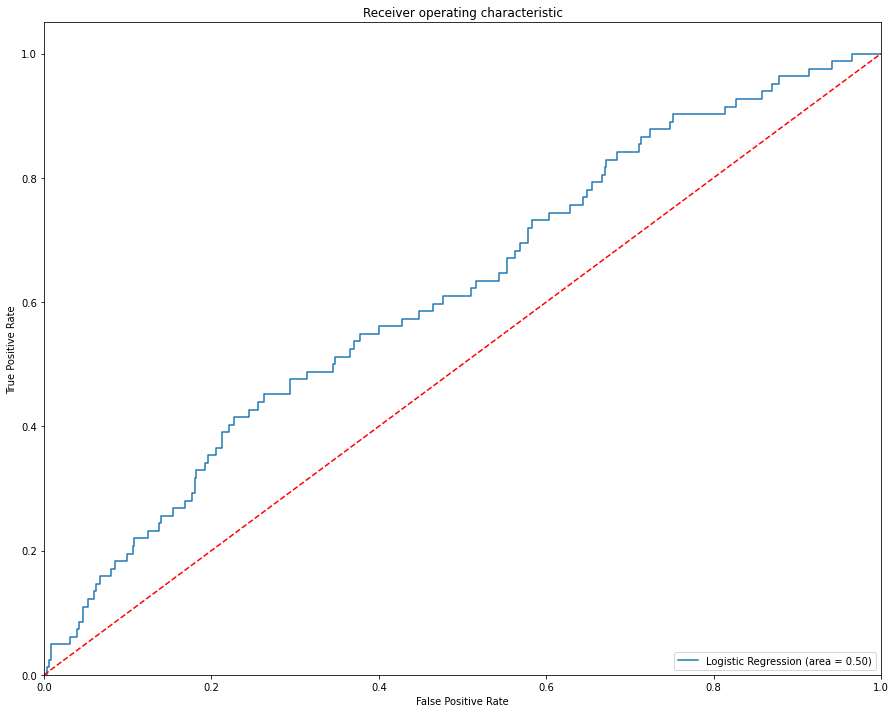

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.figure(figsize = (15,12))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

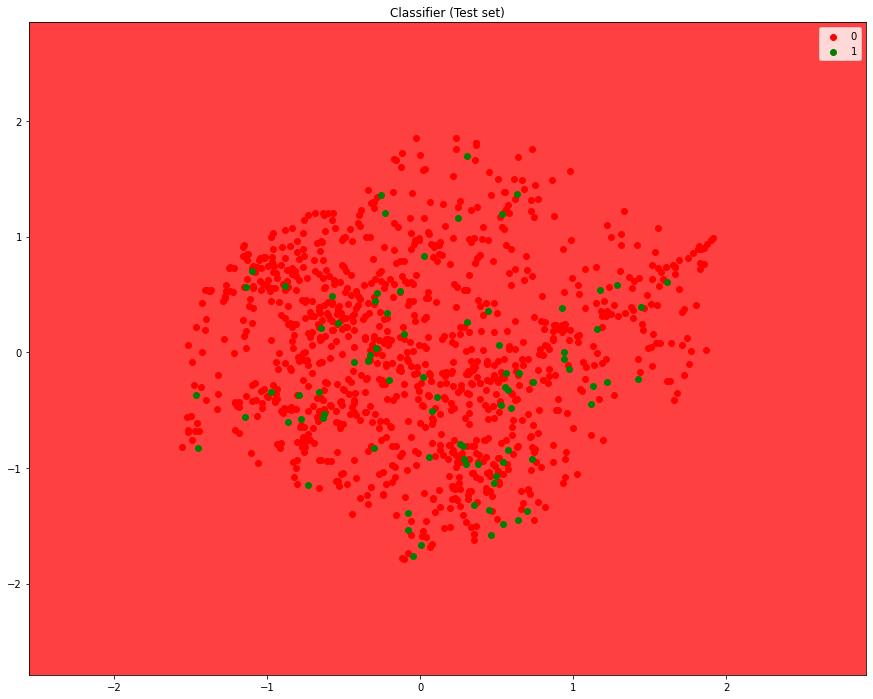

In [ ]:
from matplotlib.colors import ListedColormap
plt.figure(figsize = (15,12))
X_set, y_set = X_test.to_numpy(), y_test.to_numpy()
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1,
                               stop = X_set[:,0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1,
                               stop = X_set[:,1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(
             np.array([X1.ravel(), X2.ravel()]).T).reshape(
             X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Classifier (Test set)')


plt.legend()
plt.show()

In [ ]:
final = pd.DataFrame(X_test_f)
df_log_reg = pd.concat([final.reset_index(drop = True), pd.DataFrame(y_pred)], axis = 1)
df_log_reg.rename(columns = {0:'reliable_client'}, inplace = True )
df_log_reg

,ID,DTI,Period_at_work,age,max90days,max60days,max30days,max21days,max14days,avg_num_delay,...,EMPL_FORM_Индивидуальный предприниматель,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_вдовец / вдова,FAMILY_STATUS_гражданский брак,FAMILY_STATUS_женат / замужем,FAMILY_STATUS_повторный брак,FAMILY_STATUS_разведен / разведена,FAMILY_STATUS_холост / не замужем,reliable_client
0,1068605,0.29,32.0,31.0,2.0,2.0,0.0,0.0,0.0,0.000000,...,0,0,1,0,0,1,0,0,0,0
1,1077885,0.26,53.0,41.0,0.0,0.0,0.0,0.0,0.0,0.090909,...,0,0,1,0,0,0,0,0,1,0
2,1178545,0.36,10.0,42.0,0.0,0.0,0.0,0.0,0.0,0.338346,...,1,0,0,0,0,1,0,0,0,0
3,1082665,0.59,9.0,29.0,0.0,0.0,0.0,0.0,0.0,0.030303,...,0,0,0,0,0,1,0,0,0,0
4,1133025,0.57,104.0,35.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,1175565,0.56,28.0,42.0,2.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,1,0,0,1,0,0,0,1
1094,1063125,0.49,138.0,50.0,3.0,2.0,2.0,2.0,2.0,0.196970,...,0,0,1,0,0,1,0,0,0,0
1095,1143145,0.25,31.0,49.0,1.0,1.0,1.0,1.0,1.0,0.000000,...,0,0,0,0,0,0,0,1,0,1
1096,1043745,0.43,38.0,41.0,0.0,0.0,0.0,0.0,0.0,0.028571,...,0,0,0,0,0,1,0,0,0,0


Let's see what characteristics will distinguish a reliable client

In [ ]:
def columnValuess(column):
    unreliable = df_log_reg.loc[df_log_reg['reliable_client'] == 0, column].median()
    reliable = df_log_reg.loc[df_log_reg['reliable_client'] == 1, column].median()

    row = [unreliable, reliable]
    return row

table = []
for column in df_log_reg:
    table.append([column] + columnValues(column))

print(tabulate(table, headers=["Column","Segment 1","Segment 2"], tablefmt="orgbtl"))

Column                                                      Segment 1     Segment 2
-------------------------------------------------------  ------------  ------------
ID                                                        1.09322e+06   1.08954e+06
DTI                                                       0.41          0.42
Period_at_work                                           39            50
age                                                      34            36
max90days                                                 1             1
max60days                                                 1             1
max30days                                                 0             0
max21days                                                 0             0
max14days                                                 0             0
avg_num_delay                                             0.020101      0
if_zalog                                                  0             0
num_A

Little becomes clear from this summary of information, because reliable and unreliable clients are very similar, except for gender. The male gender is characteristic of reliable clients, but I think this is a little delusional. Most likely the data is not quite correct